In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Wczytanie pliku Excela
file_path = 'ZESTAWIENIA.xlsx'
sheet_name = 'Zakres P1'
import numpy as np
from matplotlib.transforms import blended_transform_factory
from matplotlib.patheffects import Normal, withStroke, SimpleLineShadow
%matplotlib inline
import re

In [2]:
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
df

,Ciecz,zakres prędkości (m/s) badanych cieczy jonowych,u max,pmin,dp
0,[C4Mim][N(CN)2],95.000,95.000,0.1000,94.9000
1,[C4Mim][C1SO4],95.000,95.000,0.1000,94.9000
2,[C2Mim][C2SO4],101.000,101.000,0.1000,100.9000
3,[C2Mim][C1SO3],60.790,60.790,0.1010,60.6890
4,[C4Mim][BF4],151.000,151.000,0.1000,150.9000
5,[C2C2im][C2SO4],101.320,101.320,0.1000,101.2200
6,[C4Mim][PF6],150.925,150.925,0.1000,150.8250
7,[C8Mim][PF6],139.962,139.962,0.1010,139.8610
8,[C2imC1OC10][NTf2],196.200,196.200,0.1019,196.0981
9,[C2imC1OC6][NTf2],196.200,196.200,0.1019,196.0981


In [4]:
labels = [label.replace('4', '$_4$').replace('2', '$_2$') for label in df['Ciecz']]


In [5]:
import re
def add_subscript(match):
    return f'$_{match.group(0)}$'

# Zdefiniowany obiekt labels z indeksami dolnymi
labels = [re.sub(r'\d+', add_subscript, label) if label != '[2 HEA][Pr]' else label for label in df['Ciecz']]
formatted_labels = [re.sub(r'\d+', add_subscript, label) for label in labels]
formatted_labels = [re.sub(r'(?<=\[S\d)\d', add_subscript, label) for label in labels]

<BarContainer object of 30 artists>

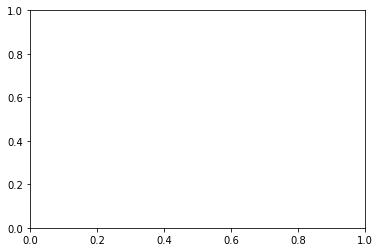

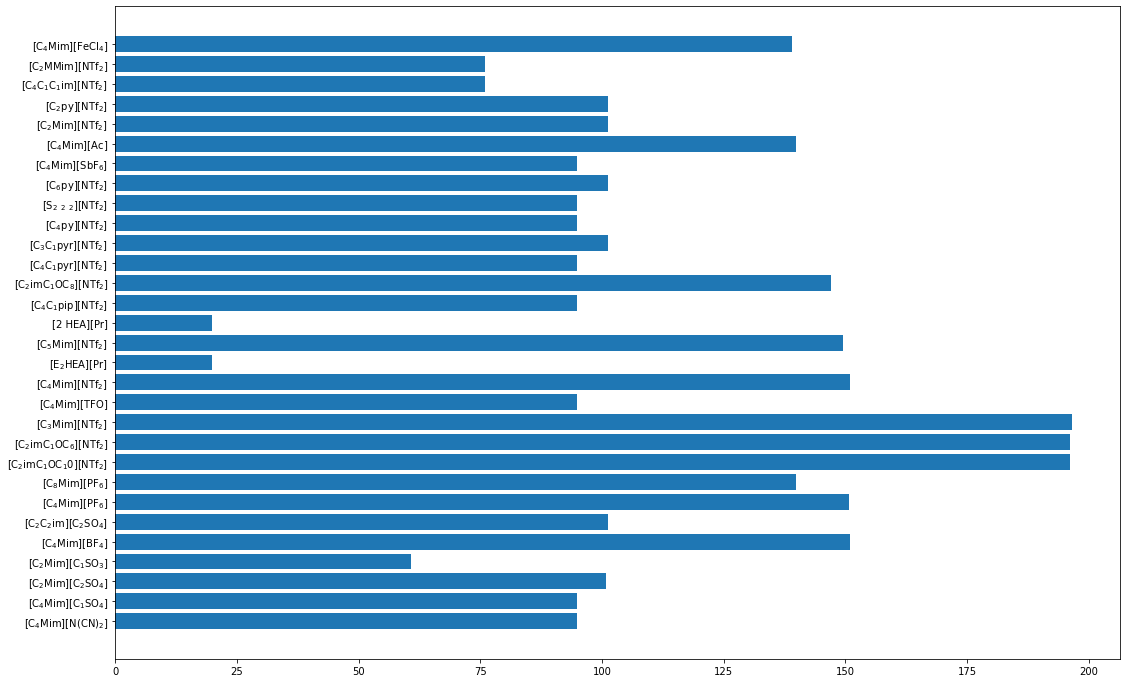

In [6]:
fig, ax = plt.subplots()

plt.figure(figsize=(18, 12))
plt.barh(df['Ciecz'], df['dp'],tick_label=labels)

In [7]:
import re


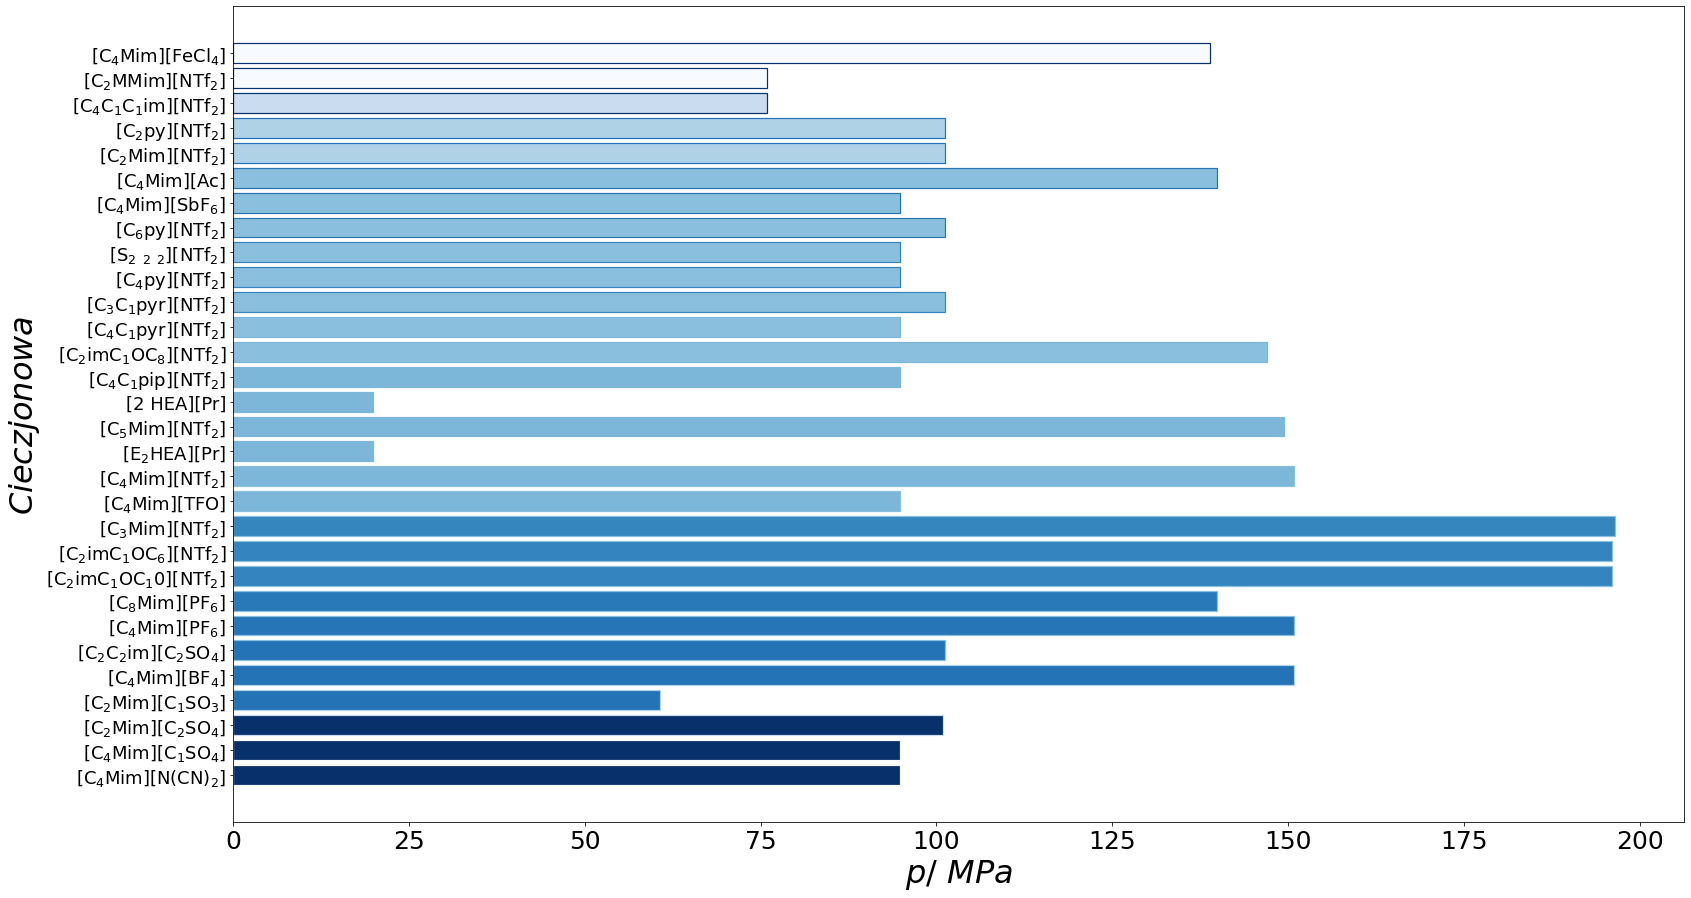

<Figure size 1296x864 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(26, 15))
df_sorted = df.sort_values(by='dp', ascending=False)

# Normalizacja wartości dp do zakresu 0-1
dp_normalized = (df_sorted['dp'] - df_sorted['dp'].min()) / (df_sorted['dp'].max() - df_sorted['dp'].min())

# Tworzenie gradientowego koloru w zależności od wartości dp_normalized
colors = plt.cm.Blues(dp_normalized)
reversed_colors = colors[::-1]
plt.figure(figsize=(18, 12))
bars = ax.barh(df['Ciecz'], df['dp'], color=colors, edgecolor=reversed_colors, linewidth=1.2,tick_label=labels)

# Dodanie cienia pod słupkami
for bar in bars:
    bar.set_zorder(1)  # Ustawiamy niższą warstwę, aby cień był widoczny
# shadow = withStroke(linewidth=3, foreground="0.15")
# for bar in bars:
#     bar.set_zorder(0)
#     bar.set_path_effects([Normal(), SimpleLineShadow(shadow)])
ax.set_xlabel(r'$\mathit{p/\,\,MPa}$',fontsize= 32)
ax.set_ylabel(r'$\mathit{Ciecz jonowa}$', fontsize=32)
# ax.set_title('Horyzontalny wykres słupkowy - Wartość dp dla różnych cieczy')
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=25)
# Dodanie efektu cienia pod słupkami
ax.set_axisbelow(True)
# ax.yaxis.grid(color='gray', linestyle='dashed')
# ax.xaxis.grid(color='gray', linestyle='dashed')
# ax.set_axisbelow(False)
# # Pokazanie wykresu
fig.savefig('Pressure.png', dpi=300)
fig.savefig('Pressure.jpg', dpi = 350)
plt.show()

In [8]:
file_path = 'ZESTAWIENIA.xlsx'
sheet_name = 'Izoterma i izobara gęstość'
dfr = pd.read_excel(file_path, sheet_name=sheet_name)

In [9]:
dfr

,Ciecz jonowa,Gęstość kg/m^3 dla T=298.15 i p =0.1
0,[C2py][NTf2],1537.56
1,[C2Mim][NTf2],1518.38
2,[C2MMim][NTf2],1492.67
3,[C3Mim][NTf2],1475.70
4,[C4py][NTf2],1448.39
5,[C4Mim][NTf2],1437.04
6,[C3C1pyr][NTf2],1432.58
7,[C4C1C1im][NTf2],1418.27
8,[C5Mim][NTf2],1404.45
9,[C6py][NTf2],1383.14


In [10]:
def add_subscript(match):
    return f'$_{match.group(0)}$'

# Zdefiniowany obiekt labels z indeksami dolnymi
labelsrho = [re.sub(r'\d+', add_subscript, label) if label != '[2 HEA][Pr]' else label for label in dfr['Ciecz jonowa']]
formatted_labelsrho = [re.sub(r'\d+', add_subscript, label) for label in labelsrho]
formatted_labelsrho = [re.sub(r'(?<=\[S\d)\d', add_subscript, label) for label in labelsrho]

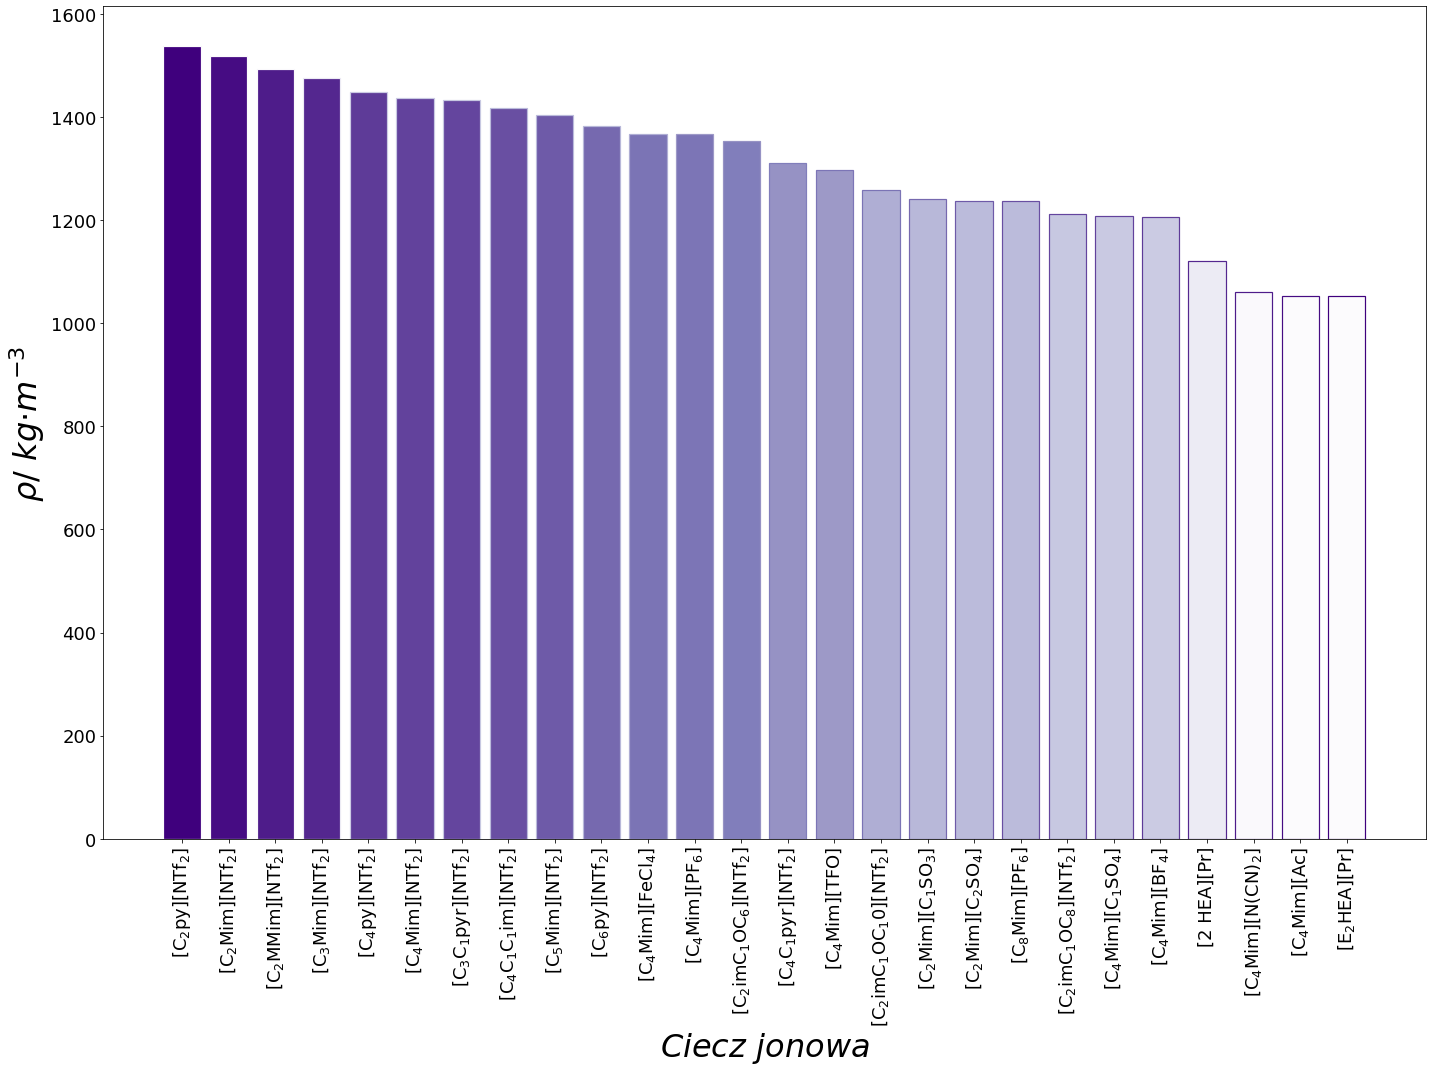

In [12]:
dfrho_sorted = dfr.sort_values(by='Gęstość kg/m^3 dla T=298.15 i p =0.1', ascending=False)

# Tworzenie gradientowego koloru w zależności od wartości gęstości
dp_normalized = (dfrho_sorted['Gęstość kg/m^3 dla T=298.15 i p =0.1'] - dfrho_sorted['Gęstość kg/m^3 dla T=298.15 i p =0.1'].min()) / (dfrho_sorted['Gęstość kg/m^3 dla T=298.15 i p =0.1'].max() - dfrho_sorted['Gęstość kg/m^3 dla T=298.15 i p =0.1'].min())
colors = plt.cm.Purples(dp_normalized)
reversed_colors = colors[::-1]

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(20, 15))
bars = ax.bar(dfrho_sorted['Ciecz jonowa'], dfrho_sorted['Gęstość kg/m^3 dla T=298.15 i p =0.1'], color=colors, edgecolor=reversed_colors, linewidth=1.2,tick_label=formatted_labelsrho)

# Dodanie etykiet i tytułu
ax.set_ylabel(r'$\mathit{\rho/ \,\, kg⋅m^{-3}}$', fontsize=32)
ax.set_xlabel(r'$\mathit{Ciecz\ jonowa}$', fontsize=32)
#ax.set_title('Gęstość dla różnych cieczy jonowych', fontsize=18)
ax.tick_params(axis='x', rotation=90, labelsize=18)
ax.tick_params(axis='y', labelsize=18)
# Pokazanie wykresu
plt.tight_layout()
plt.savefig('wykres_gestosci.png', dpi=300)
plt.show()
#W kodzie powyżej użyłem odpowiednich kolumn z DataFrame, znormalizowałem wartości i stworzyłem gradientowy kolor na podstawie gęstości. Dodatkowo, przeprowadziłem drobne modyfikacje, aby upewnić się, że etykiety osi i tytuł mają odpowiednie rozmiary czcionek.







# Wykres dla rozpiętości prędkości

In [13]:
file_path = 'ZESTAWIENIA.xlsx'
sheet_name = 'Izoterma i izobara predkość'
dfu = pd.read_excel(file_path, sheet_name=sheet_name)

In [14]:
il = 'Ciecz jonowa'
datau = 'Prędkość m/s dla T=298.15 i p =0.1'

In [15]:
def add_subscript(match):
    return f'$_{match.group(0)}$'

# Zdefiniowany obiekt labels z indeksami dolnymi
labelsU = [re.sub(r'\d+', add_subscript, label) if label != '[2 HEA][Pr]' else label for label in dfu[il]]
formatted_labelsu = [re.sub(r'\d+', add_subscript, label) for label in labelsU]

formatted_labelsu = [re.sub(r'(?<=\[S\d)\d', add_subscript, label) for label in labelsU]

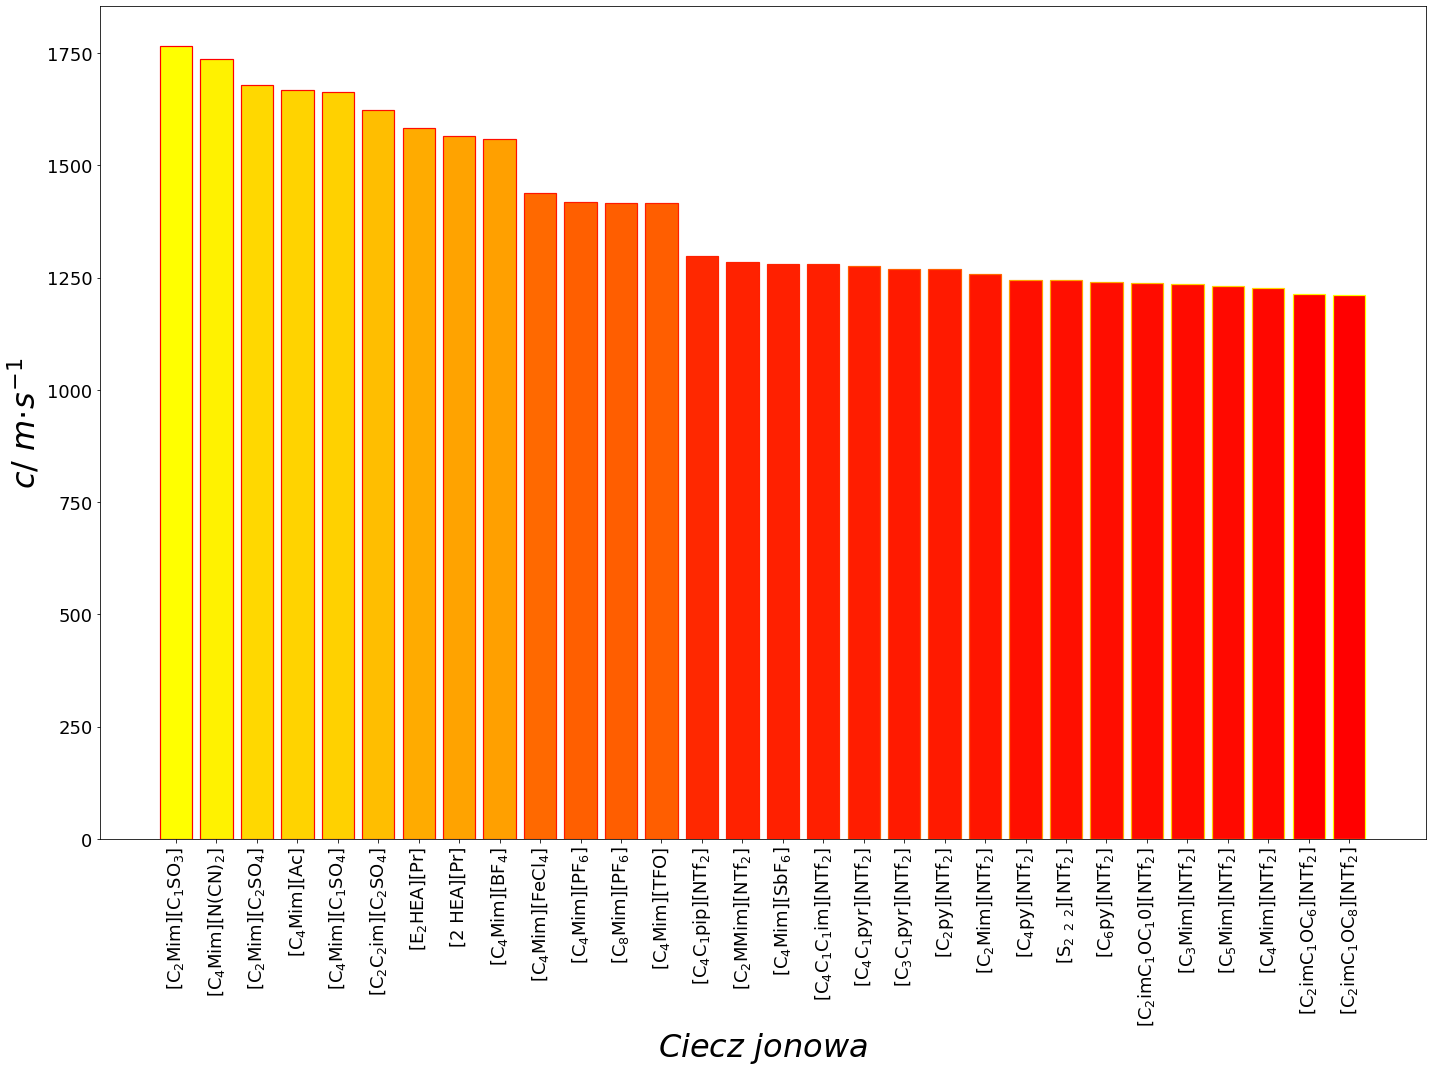

In [17]:
dfu_sorted = dfu.sort_values(by=datau, ascending=False)

# Tworzenie gradientowego koloru w zależności od wartości gęstości
dfu_normalized = (dfu_sorted[datau] - dfu_sorted[datau].min()) / (dfu_sorted[datau].max() - dfu_sorted[datau].min())
colors = plt.cm.autumn(dfu_normalized)
reversed_colors = colors[::-1]

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(20, 15))
bars = ax.bar(dfu_sorted[il], dfu_sorted[datau], color=colors, edgecolor=reversed_colors, linewidth=1.2,
              tick_label=formatted_labelsu)

# Dodanie etykiet i tytułu
ax.set_ylabel(r'$\mathit{c}/\,\, \mathit{m⋅s^{-1}}$', fontsize=32)
ax.set_xlabel(r'$\mathit{Ciecz\ jonowa}$', fontsize=32)
#ax.set_title('Gęstość dla różnych cieczy jonowych', fontsize=18)
ax.tick_params(axis='x', rotation=90, labelsize=18)
ax.tick_params(axis='y', labelsize=18)
# Pokazanie wykresu
plt.tight_layout()
plt.savefig('wykres_cms.png', dpi=300)
plt.show()

In [18]:
len(labelsU)

30

In [19]:
len(dfu)

30

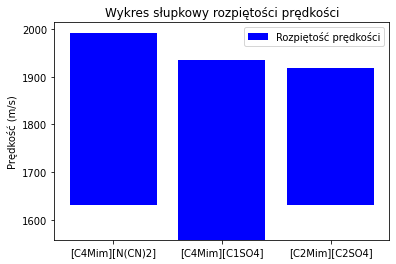

In [20]:
import matplotlib.pyplot as plt

ciecze = ['[C4Mim][N(CN)2]', '[C4Mim][C1SO4]', '[C2Mim][C2SO4]']
u_max = [1992.3, 1935.9, 1918.59]
u_min = [1631.8, 1558.1, 1631.12]
d_u = [360.5, 377.8, 287.47]

fig, ax = plt.subplots()
ax.bar(ciecze, d_u, bottom=u_min, color='blue', label='Rozpiętość prędkości')
# ax.bar(ciecze, u_max, color='white', edgecolor='blue', linewidth=1, label='u_max')
# ax.bar(ciecze, u_min, color='white', edgecolor='blue', linewidth=1, label='u_min')

ax.set_ylabel('Prędkość (m/s)')
ax.set_title('Wykres słupkowy rozpiętości prędkości')
ax.legend()

plt.show()

In [21]:
file_path = 'ZESTAWIENIA.xlsx'
sheet_name = 'Zakres U'

In [22]:
dfu1 = pd.read_excel(file_path, sheet_name=sheet_name)

In [23]:
il = 'Ciecz'
datau = 'd u'


In [24]:
def add_subscript(match):
    return f'$_{match.group(0)}$'

# Zdefiniowany obiekt labels z indeksami dolnymi
labelsU = [re.sub(r'\d+', add_subscript, label) if label != '[2 HEA][Pr]' else label for label in dfu1[il]]
formatted_labelsu = [re.sub(r'\d+', add_subscript, label) for label in labelsU]
formatted_labelsu = [re.sub(r'(?<=\[S\d)\d', add_subscript, label) for label in labelsU]

In [25]:
dfu1

,Ciecz,zakres prędkości (m/s) badanych cieczy jonowych,u max,u min,d u
0,[C4Mim][N(CN)2],1992.3000,1992.30,1631.8000,360.5000
1,[C4Mim][C1SO4],1935.9000,1935.90,1558.1000,377.8000
2,[C2Mim][C2SO4],1918.5900,1918.59,1631.1200,287.4700
3,[C2Mim][C1SO3],1915.8300,1915.83,1704.5800,211.2500
4,[C4Mim][BF4],1906.7308,1915.83,1501.6088,414.2212
5,[C2C2im][C2SO4],1883.2500,1883.25,1573.7300,309.5200
6,[C4Mim][PF6],1772.6100,1772.61,1367.9800,404.6300
7,[C8Mim][PF6],1751.4600,1751.46,1140.8500,610.6100
8,[C2imC1OC10][NTf2],1714.2000,1714.20,1059.5000,654.7000
9,[C2imC1OC6][NTf2],1706.9000,1706.90,1041.5000,665.4000


In [26]:
max(u_max)

1992.3

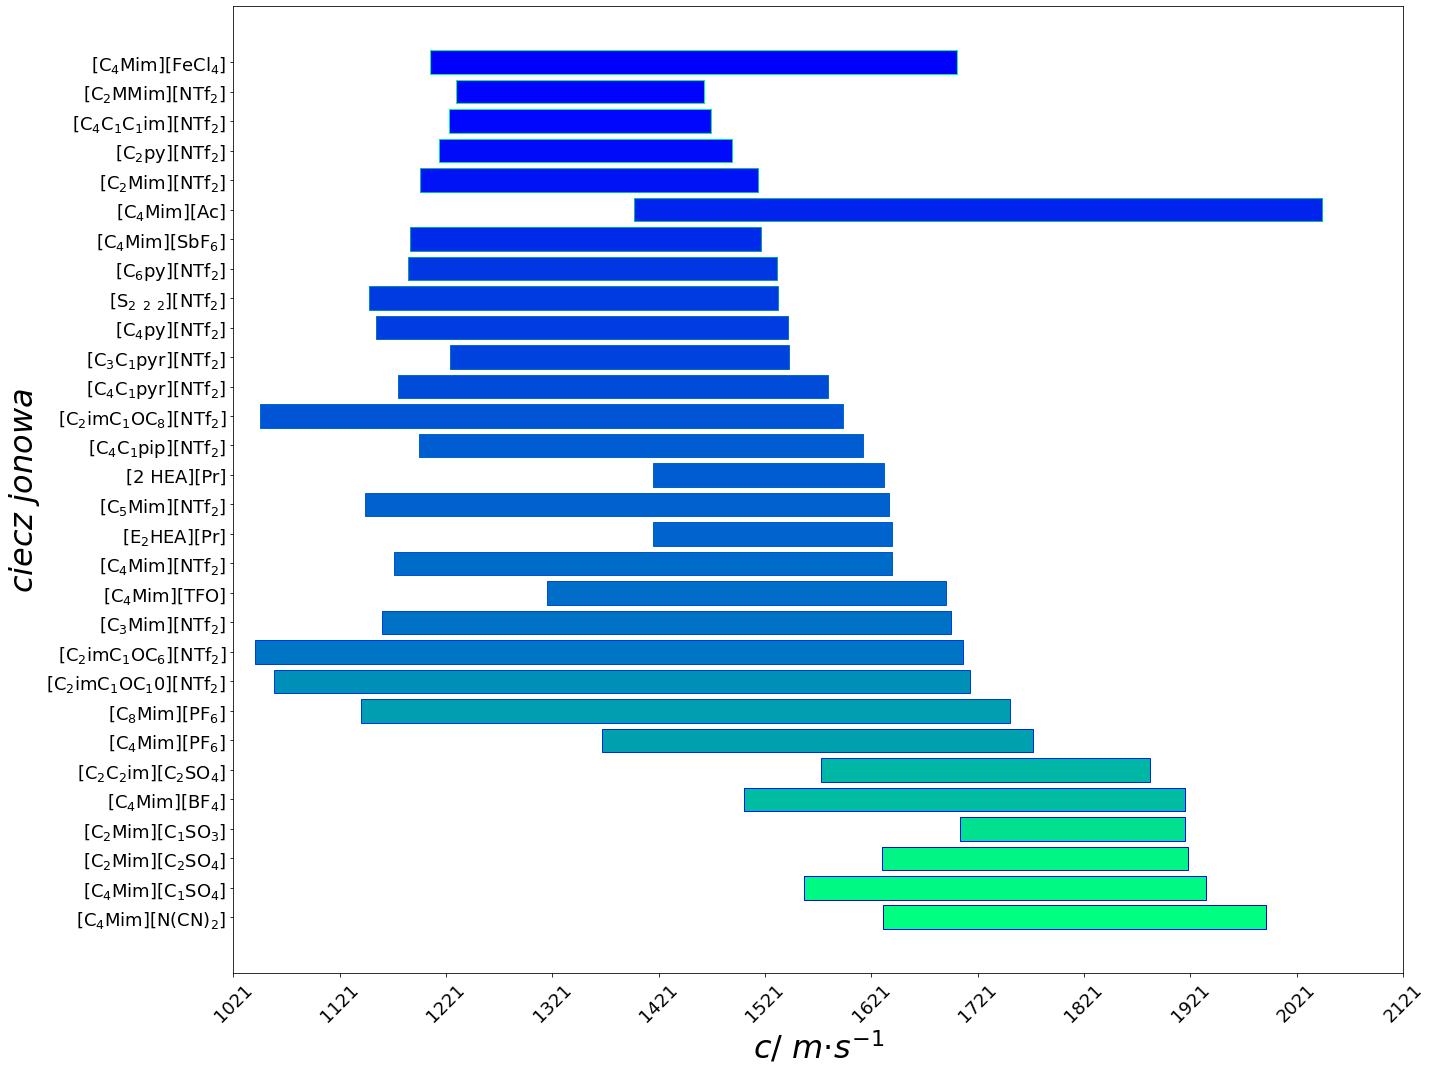

In [27]:
ciecze = dfu1['Ciecz']
u_max = dfu1['u max']
u_min = dfu1['u min']
d_u = dfu1['d u']

dfu_sorted = dfu1.sort_values(by='d u', ascending=False)

# Tworzenie gradientowego koloru w zależności od wartości d_u
dfu_normalized = (dfu_sorted['d u'] - dfu_sorted['d u'].min()) / (dfu_sorted['d u'].max() - dfu_sorted['d u'].min())
colors = plt.cm.winter(dfu_normalized)
reversed_colors = colors[::-1]


# Stwórz wykres
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(ciecze, d_u, left=u_min, color=colors, edgecolor=reversed_colors, tick_label=formatted_labelsu)
# ax.bar(ciecze, u_max, color='white', edgecolor='blue', linewidth=1, label='u_max')
# ax.bar(ciecze, u_min, color='white', edgecolor='blue', linewidth=1, label='u_min')

ax.set_xlabel('Prędkość (m/s)')
# ax.set_title('Wykres słupkowy rozpiętości prędkości')




# plt.xticks(rotation=45)  # Obróć etykiety osi X, aby były czytelne
# plt.tight_layout()       # Dostosuj układ wykresu
# ax.tick_params(axis='y', labelsize=18)
# ax.tick_params(axis='x', labelsize=18)
# ax.set_xlabel('c (m/s)', fontsize=32)
# ax.set_ylabel('ciecz jonowa', fontsize=32)
# # Pokazanie wykresu
# plt.tight_layout()
# plt.savefig('wykres_rozpietosci.png', dpi=300)
# plt.show()
# Powyższy kod używa danych z kolumn w DataFrame dfu1 do stworzenia wykresu słupkowego. Możesz go dostosować do swoich danych i preferencji wizualnych.

# Ustawienie interwału etykiet na osi X, zaczynając od 1000
start_value = int(min(u_min))-20
end_value = int(max(u_max))  # Maksymalna wartość z kolumny 'd u'
step = 100  # Krok między etykietami
xticks = np.arange(start_value, end_value + step, step)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)  # Nadaj etykietom wartości cyfrowe i obróć je

# Dostosuj inne parametry i opcje wykresu
plt.tight_layout()
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)
# ax.set_xlabel('$c \,/\, \mathrm{m\,s^{-1}}$', fontsize=32)
ax.set_xlabel(r'$\mathit{c}/\,\, \mathit{m⋅s^{-1}}$', fontsize=32)  # Cała etykieta jest kursywą
ax.set_ylabel(r'$\mathit{ciecz\ jonowa}$', fontsize=32)
# Pokazanie wykresu
plt.tight_layout()
plt.savefig('wykres_rozpietosci.png', dpi=300)
plt.show()





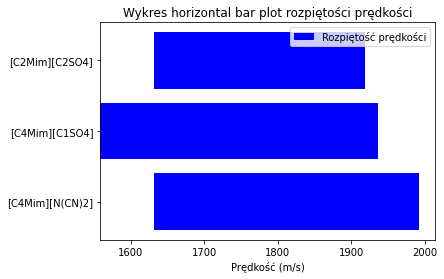

In [60]:
ciecze = ['[C4Mim][N(CN)2]', '[C4Mim][C1SO4]', '[C2Mim][C2SO4]']
u_max = [1992.3, 1935.9, 1918.59]
u_min = [1631.8, 1558.1, 1631.12]
d_u = [360.5, 377.8, 287.47]

fig, ax = plt.subplots()
ax.barh(ciecze, d_u, left=u_min, color='blue', label='Rozpiętość prędkości')


ax.set_xlabel('Prędkość (m/s)')
ax.set_title('Wykres horizontal bar plot rozpiętości prędkości')
ax.legend()

plt.show()

# Wykres dla rozpiętości T

In [61]:
file_path = 'ZESTAWIENIA.xlsx'
sheet_name = 'Zakres  T'

In [62]:
dfu1 = pd.read_excel(file_path, sheet_name=sheet_name)

In [63]:
il = 'Ciecz'
datau = 'dT'

In [64]:
def add_subscript(match):
    return f'$_{match.group(0)}$'

# Zdefiniowany obiekt labels z indeksami dolnymi
labelsU = [re.sub(r'\d+', add_subscript, label) if label != '[2 HEA][Pr]' else label for label in dfu1[il]]
formatted_labelsu = [re.sub(r'\d+', add_subscript, label) for label in labelsU]
formatted_labelsu = [re.sub(r'(?<=\[S\d)\d', add_subscript, label) for label in labelsU]

In [65]:
u_min

[1631.8, 1558.1, 1631.12]

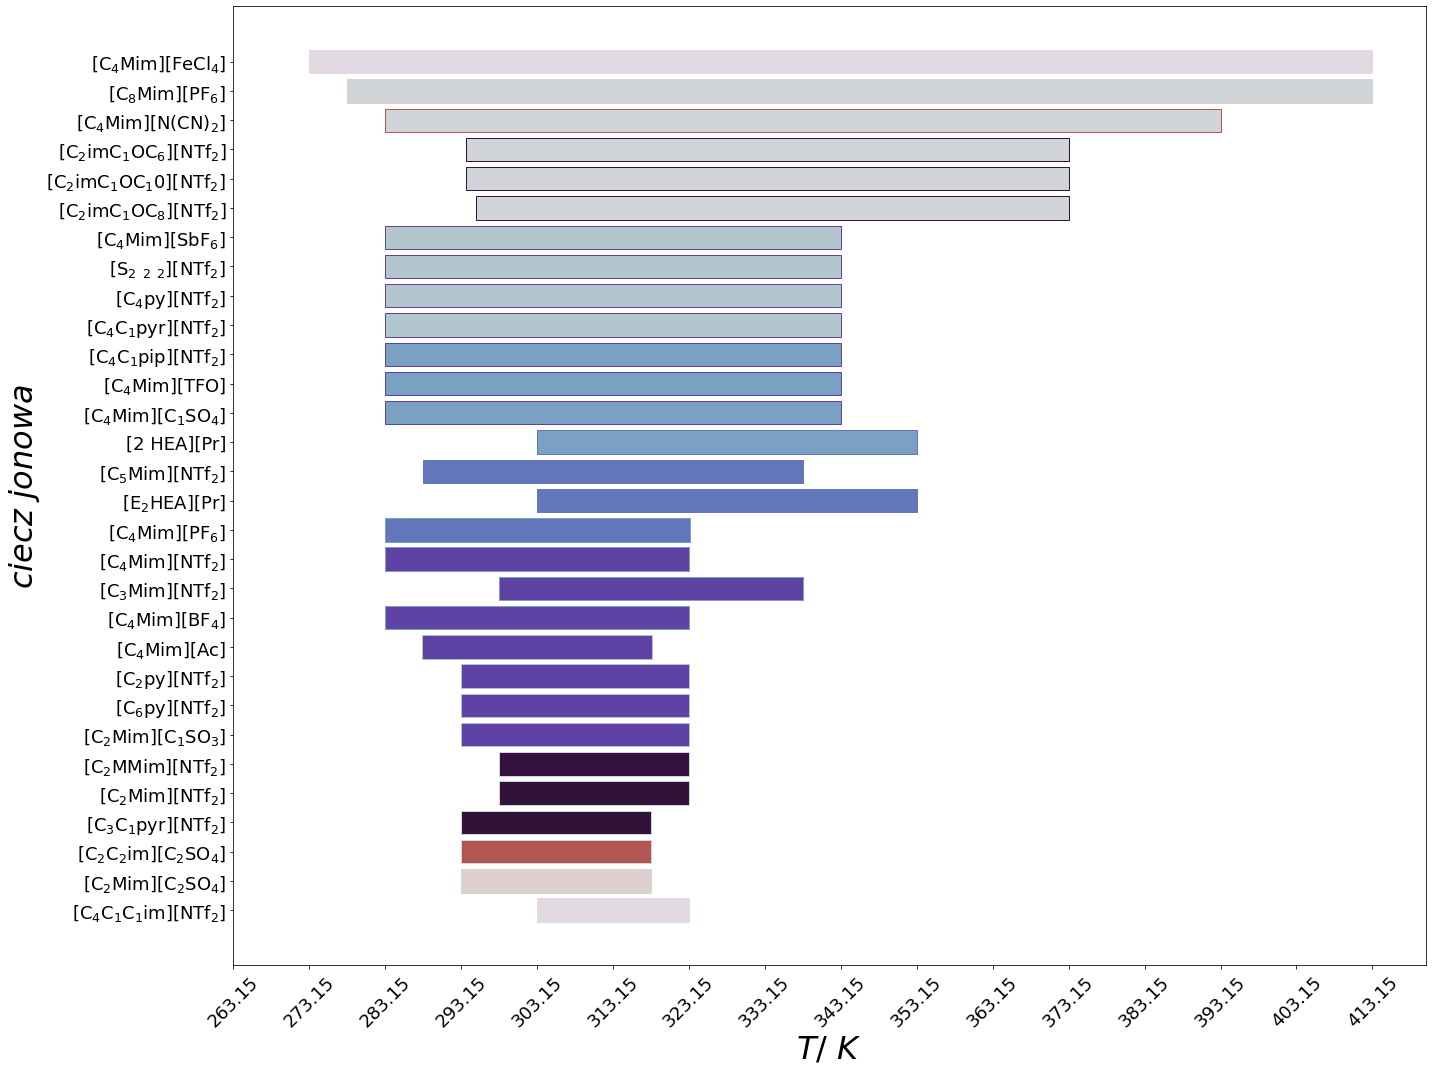

In [66]:
from matplotlib.ticker import FormatStrFormatter
ciecze = dfu1['Ciecz']
u_max = dfu1['Tmax']
u_min = dfu1['Tmin']
d_u = dfu1['dT']

dfu_sorted = dfu1.sort_values(by='dT', ascending=False)

# Tworzenie gradientowego koloru w zależności od wartości d_u
dfu_normalized = (dfu_sorted['dT'] - dfu_sorted['dT'].min()) / (dfu_sorted['dT'].max() - dfu_sorted['dT'].min())
colors = plt.cm.twilight(dfu_normalized)
reversed_colors = colors[::-1]


# Stwórz wykres
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(ciecze, d_u, left=u_min, color=colors, edgecolor=reversed_colors, tick_label=formatted_labelsu)
# ax.bar(ciecze, u_min, color='white', edgecolor='blue', linewidth=1, label='u_max')
# ax.bar(ciecze, u_max, color='white', edgecolor='blue', linewidth=1, label='u_min')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# ax.set_title('Wykres słupkowy rozpiętości prędkości')
start_value = min(u_min)-10
end_value = max(u_max)  # Maksymalna wartość z kolumny 'd u'
step = 10  # Krok między etykietami
xticks = np.arange(start_value, end_value + step, step)
ax.set_xticks(xticks)

plt.xticks(rotation=45)  # Obróć etykiety osi X, aby były czytelne
plt.tight_layout()       # Dostosuj układ wykresu
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.set_xlabel(r'$\mathit{T/\,\, K}$', fontsize=32)
ax.set_ylabel(r'$\mathit{ciecz\ jonowa}$', fontsize=32)
# Pokazanie wykresu
plt.tight_layout()
plt.savefig('wykres_rozpietosciT.png', dpi=300)
plt.show()
# Powyższy kod używa danych z kolumn w DataFrame dfu1 do stworzenia wykresu słupkowego. Możesz go dostosować do swoich danych i preferencji wizualnych.


In [25]:
dfu1

,Ciecz,Temperatura min,T max,Zakres temperatur
0,[C4C1C1im][NTf2],303.15,323.15,20.00
1,[C2Mim][C2SO4],293.15,318.15,25.00
2,[C2C2im][C2SO4],293.15,318.15,25.00
3,[C3C1pyr][NTf2],293.15,318.15,25.00
4,[C2Mim][NTf2],298.15,323.15,25.00
5,[C2MMim][NTf2],298.15,323.15,25.00
6,[C2Mim][C1SO3],293.15,323.15,30.00
7,[C6py][NTf2],293.15,323.15,30.00
8,[C2py][NTf2],293.15,323.15,30.00
9,[C4Mim][Ac],288.07,318.25,30.18
